In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
df = pd.read_csv('../datasets/new_train.csv')
df_test = pd.read_csv('../datasets/test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2051 non-null   int64  
 1   ms_zoning        2051 non-null   object 
 2   lot_frontage     2051 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   street           2051 non-null   object 
 5   lot_shape        2051 non-null   object 
 6   land_contour     2051 non-null   object 
 7   utilities        2051 non-null   object 
 8   lot_config       2051 non-null   object 
 9   land_slope       2051 non-null   object 
 10  neighborhood     2051 non-null   object 
 11  condition_1      2051 non-null   object 
 12  condition_2      2051 non-null   object 
 13  bldg_type        2051 non-null   object 
 14  house_style      2051 non-null   object 
 15  overall_qual     2051 non-null   int64  
 16  overall_cond     2051 non-null   int64  
 17  year_built    

In [5]:
# info to consider
# bldg_type
# foundation
# house_style

# bedroom_abvgr
# full_bath

# overall_qual
# overall_cond
# year_built
# year_remod_add

**Get dummies for bldg type**

In [6]:
#Building Type
df['bldg_type'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [7]:
bt_dum= pd.get_dummies(df[['bldg_type']])

In [8]:
bt_dum.sum()

bldg_type_1Fam      1700
bldg_type_2fmCon      46
bldg_type_Duplex      75
bldg_type_Twnhs       69
bldg_type_TwnhsE     161
dtype: int64

In [9]:
# Foundation Type
df['foundation'].unique()

array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object)

In [10]:
fdn_dum= pd.get_dummies(df[['foundation']])

In [11]:
bt_dum.sum()

bldg_type_1Fam      1700
bldg_type_2fmCon      46
bldg_type_Duplex      75
bldg_type_Twnhs       69
bldg_type_TwnhsE     161
dtype: int64

In [12]:
# House style
df['house_style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

In [13]:
hstl_dum= pd.get_dummies(df[['house_style']])

In [14]:
hstl_dum.sum()

house_style_1.5Fin     218
house_style_1.5Unf      12
house_style_1Story    1059
house_style_2.5Fin       6
house_style_2.5Unf      14
house_style_2Story     598
house_style_SFoyer      50
house_style_SLvl        94
dtype: int64

**Get Quality**

In [15]:
df['garage_qual'].unique()

array(['TA', 'Fa', '0', 'Gd', 'Ex', 'Po'], dtype=object)

In [16]:
g_q = df['garage_qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, '0': 0})

In [17]:
g_q.unique()

array([3, 2, 0, 4, 5, 1], dtype=int64)

In [18]:
# info to consider
# bldg_type
# foundation
# house_style

# overall_qual
# overall_cond
# year_built
# year_remod_add

<AxesSubplot:xlabel='saleprice', ylabel='foundation'>

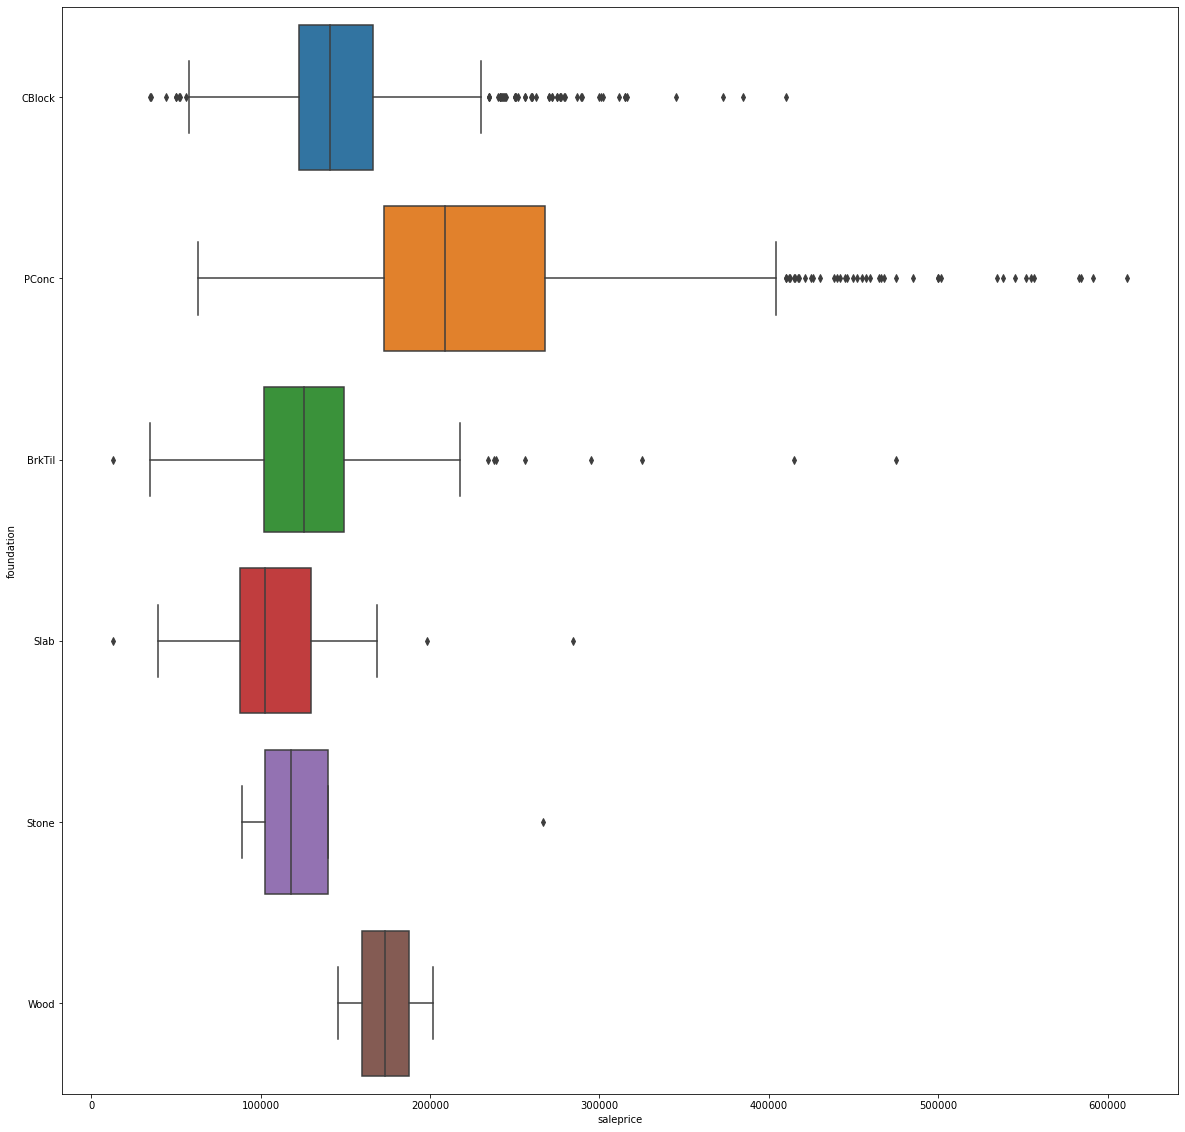

In [19]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df['saleprice'],y=df['foundation'])

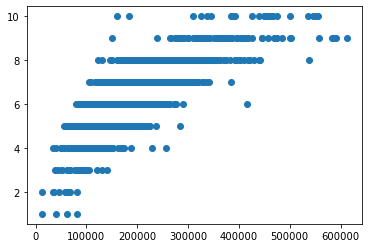

In [20]:
plt.scatter(df['saleprice'], df['overall_qual'])

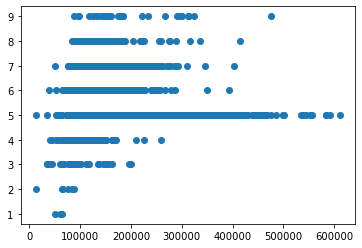

In [21]:
plt.scatter(df['saleprice'], df['overall_cond'])

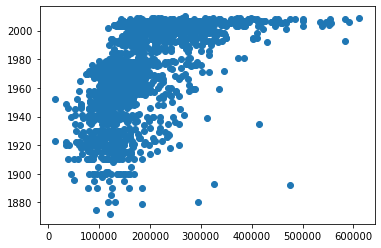

In [22]:
plt.scatter(df['saleprice'], df['year_built'])

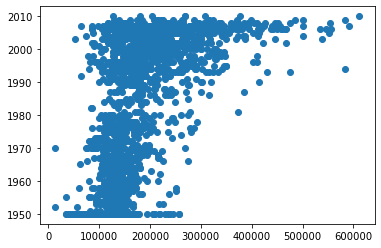

In [23]:
plt.scatter(df['saleprice'], df['year_remod_add'])

**Set base line**

In [24]:
df_test.columns = [col.replace(' ', '_').lower() for col in df_test.columns]
df_test.columns = [col.replace('/', '_').lower() for col in df_test.columns]

In [25]:
features = ['mas_vnr_area', 'totrms_abvgrd', 'full_bath', 'year_remod_add',
            'year_built', '1st_flr_sf', 'total_bsmt_sf', 'garage_cars',
             'garage_area', 'gr_liv_area', 'overall_qual']
X = df[features]
y = df['saleprice']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
# instantiate and fit
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7823634774211838, 0.8399541825260151)

In [28]:
cross_val_score(lr, X, y).mean()

0.7899706534998673

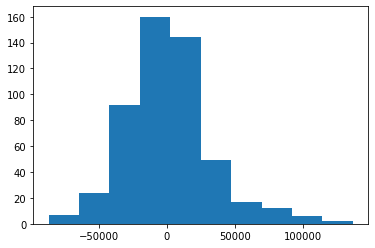

In [29]:
pred = lr.predict(X_test)
resid = y_test - pred
plt.hist(resid);

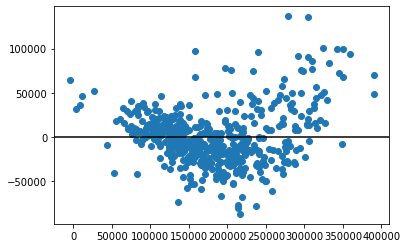

In [30]:
plt.scatter(pred, resid)
plt.axhline(0, color='black');

**Try all numerical columns**

In [31]:
features_2 = [col for col in df._get_numeric_data().columns if col not in ['saleprice']]  # from Lecture
X2 = df[features_2]
y2 = df['saleprice']

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [33]:
lr = LinearRegression()
lr.fit(X2_train, y2_train)

LinearRegression()

In [34]:
lr.score(X2_train, y2_train), lr.score(X2_test, y2_test)

(0.8304108345862736, 0.8643115427071095)

In [35]:
cross_val_score(lr, X2_train, y2_train).mean()

0.7712661049989101

In [36]:
pred = lr.predict(X2_test)
resid = y2_test - pred

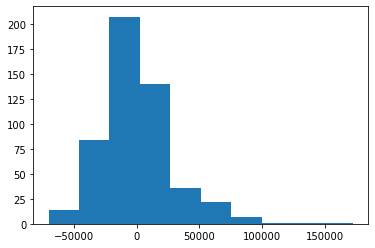

In [37]:
plt.hist(resid);

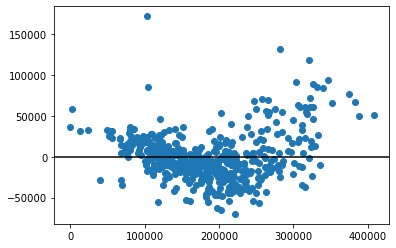

In [38]:
plt.scatter(pred, resid)
plt.axhline(0, color='black');

**Scaled Model**

In [39]:
features = ['mas_vnr_area', 'totrms_abvgrd', 'full_bath', 'year_remod_add',
            'year_built', '1st_flr_sf', 'total_bsmt_sf', 'garage_cars',
             'garage_area', 'gr_liv_area', 'overall_qual']
X = df[features]
y = df['saleprice']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [41]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [42]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [43]:
lr.score(X_train_sc, y_train),lr.score(X_test_sc, y_test)

(0.7823634774211838, 0.8399541825260146)

In [44]:
cross_val_score(lr, X_train_sc, y_train).mean()

0.7602871395015003

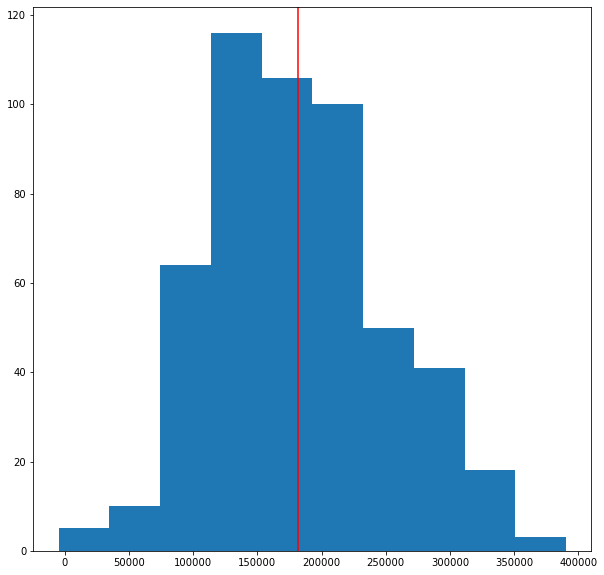

In [45]:
pred = lr.predict(X_test_sc)
resid = y_test - pred

plt.figure(figsize=(10,10))
plt.axvline(df['saleprice'].mean(), color='r')
plt.hist(pred);

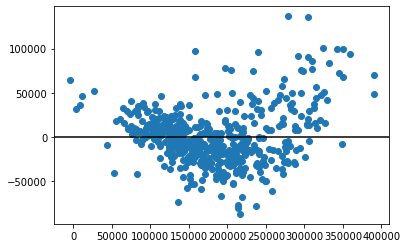

In [46]:
plt.scatter(pred, resid)
plt.axhline(0, color='black');

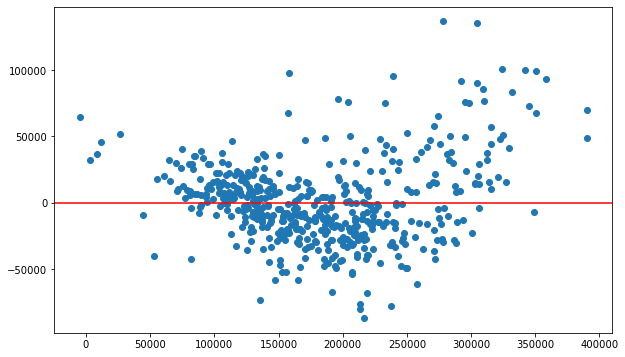

In [47]:
plt.figure(figsize=(10,6))
plt.axhline(0, color='r')
plt.scatter(pred, resid);

**Ridge** <br>
using the same features as above

In [48]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [49]:
sc = StandardScaler()
sc.fit(X_train)
Z_train = sc.transform(X_train)
Z_test = sc.transform(X_test)

ridge = Ridge(alpha=0.1)
# Fit.
ridge.fit(Z_train, y_train)

ridge.score(Z_train, y_train), ridge.score(Z_test, y_test)

(0.7823634759078155, 0.8399504936570155)

In [50]:
alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(Z_train, y_train)
ridge_cv.alpha_, ridge_cv.best_score_

(132.19411484660287, 0.7641332968815583)

In [51]:
ridge_cv.score(Z_train, y_train), ridge_cv.score(Z_test, y_test)

(0.7807923102448833, 0.8349493496713474)

**LASSO**
<br>
using the same features as above

In [52]:
from sklearn.linear_model import Lasso, LassoCV

In [53]:
l_alphas = np.logspace(-1, 0, 100)
lasso = LassoCV(alphas=l_alphas, cv=5)
lasso.fit(Z_train, y_train)
lasso.alpha_

1.0

In [54]:
lasso.score(Z_train, y_train), lasso.score(Z_test, y_test)

(0.7823634758898659, 0.839952222517655)

In [55]:
lr.score(Z_train, y_train), lr.score(Z_test, y_test)

(0.7823634774211838, 0.8399541825260146)

In [56]:
# info to consider
# bldg_type
# foundation
# house_style

# bedroom_abvgr
# full_bath

# overall_qual
# overall_cond
# year_built
# year_remod_add

**Trying Different Features**

In [57]:
# features = ['year_remod_add', 'year_built', 'overall_cond', 'overall_qual', 'full_bath',
#                'bedroom_abvgr', 'gr_liv_area']
# X = df[features]
# y = df['saleprice']

###lower scores

In [58]:
# features = ['year_remod_add', 'year_built', 'overall_cond', 'overall_qual']
# X = df[features]
# y = df['saleprice']

In [59]:
# features = bt_dum
# X = features
# y = df['saleprice']
###bad

In [60]:
# features = fdn_dum
# X = features
# y = df['saleprice']
 ###bad

In [61]:
# features = hstl_dum
# X = features
# y = df['saleprice']
###bad

**Neighborhood**

In [62]:
df['neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [63]:
neigh_dum= pd.get_dummies(df[['neighborhood']])
neigh_dum['year_remod_add'] = df['year_remod_add']
neigh_dum['year_built'] = df['year_built']
neigh_dum['overall_qual'] = df['overall_qual'] 
neigh_dum['saleprice'] = df['saleprice']
neigh_dum.sort_values(['saleprice']).tail(20)

,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,...,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,year_remod_add,year_built,overall_qual,saleprice
332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2006,2005,10,460000
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2006,2006,10,465000
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2002,2001,10,466500
685,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2006,2005,9,468000
1158,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2008,2008,9,475000
1035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1993,1892,10,475000
1700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2009,2008,9,485000
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2004,2003,9,500000
800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2007,2007,10,500067
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2009,2008,9,501837


<Figure size 576x576 with 0 Axes>

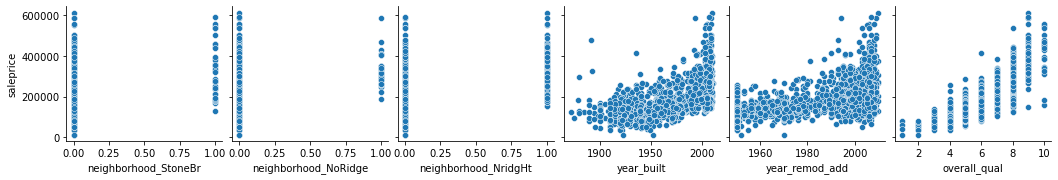

In [64]:
plt.figure(figsize=(8,8))
sns.pairplot(neigh_dum, x_vars=['neighborhood_StoneBr', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
            'year_built', 'year_remod_add', 'overall_qual'], 
            y_vars=['saleprice'])

In [65]:
features = ['neighborhood_StoneBr', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
            'year_built', 'year_remod_add', 'overall_qual']
X = neigh_dum[features]
y = df['saleprice']
features

['neighborhood_StoneBr',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'year_built',
 'year_remod_add',
 'overall_qual']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [67]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [68]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [69]:
lr.score(X_train_sc, y_train),lr.score(X_test_sc, y_test)

(0.7101550121915313, 0.7017649638855781)

**Poly Model**

In [70]:
features = ['totrms_abvgrd', 'full_bath', 'year_remod_add',
            'year_built', 'total_bsmt_sf', 'bedroom_abvgr', 'overall_qual']
X = df[features]
y = df['saleprice']

In [71]:

# features = ['gr_liv_area', 'garage_area', 'total_bsmt_sf', '1st_flr_sf', 'overall_qual' ]

# X = df[features]
# y = df['saleprice']

In [72]:
# PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.837339386776637, 0.8209945988550535)

In [75]:
cross_val_score(lr, X_train, y_train).mean()

0.8007881148136035

In [76]:
pred = lr.predict(X_test)
resid = y_test - pred

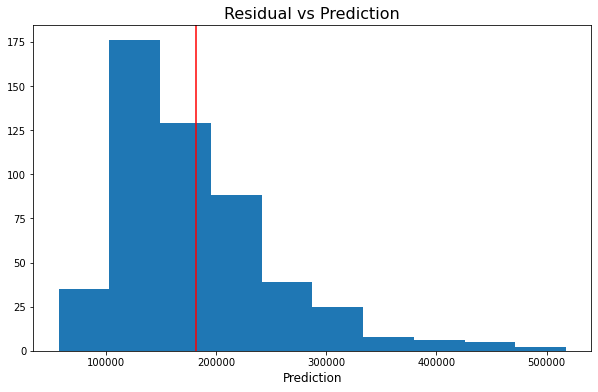

In [77]:
plt.figure(figsize=(10,6))

plt.hist(pred)
plt.xlabel('Prediction', fontsize = 12)
plt.title('Residual vs Prediction', fontsize=16)
plt.axvline(df['saleprice'].mean(), color='r')

#plt.savefig('pictures/mod1d_hist.png', bbox_inches='tight');

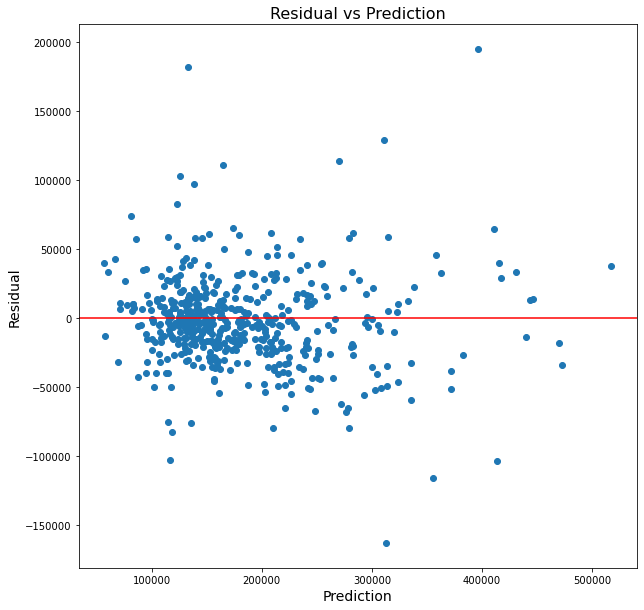

In [78]:
plt.figure(figsize=(10,10))

plt.scatter(pred, resid)
plt.title('Residual vs Prediction', fontsize=16)
plt.ylabel('Residual', fontsize=14)
plt.xlabel('Prediction', fontsize=14)
plt.axhline(0, color='r')

plt.savefig('../images/scatter.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

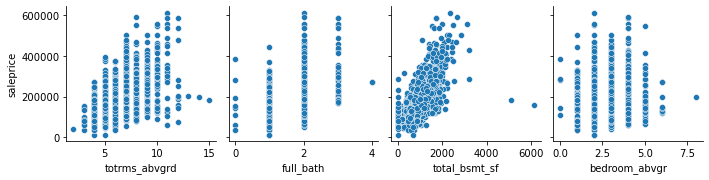

In [100]:
plt.figure(figsize=(10,10))
sns.pairplot(df, x_vars=['totrms_abvgrd', 'full_bath', 'total_bsmt_sf', 'bedroom_abvgr'], y_vars=['saleprice'])

plt.savefig('../images/scatterTscatter.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

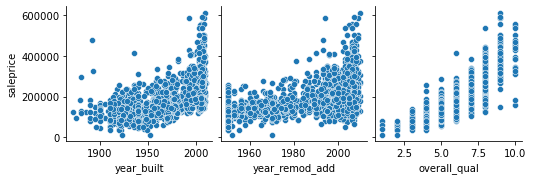

In [97]:
plt.figure(figsize=(10,10))
sns.pairplot(df, x_vars=['year_built',  'year_remod_add', 'overall_qual'], 
            y_vars=['saleprice'])

plt.savefig('../images/scatterTscatter2.png', bbox_inches='tight')

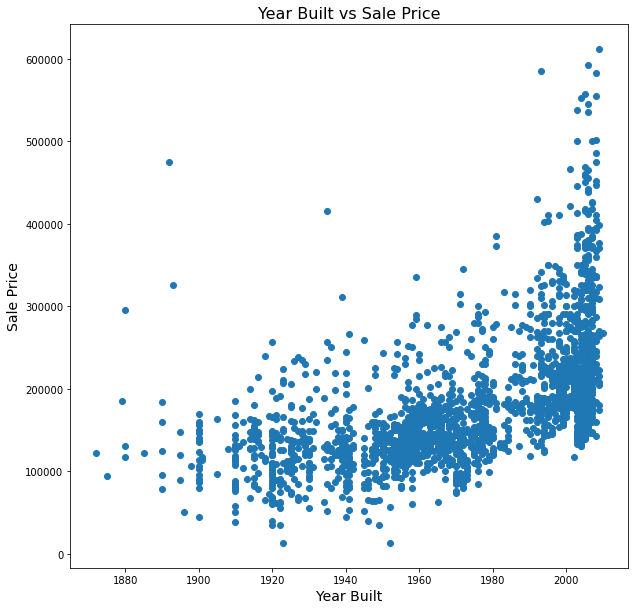

In [92]:
plt.figure(figsize=(10,10))

plt.scatter(df['year_built'], df['saleprice'])
plt.title('Year Built vs Sale Price', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.savefig('../images/scatterYBvSP.png', bbox_inches='tight')

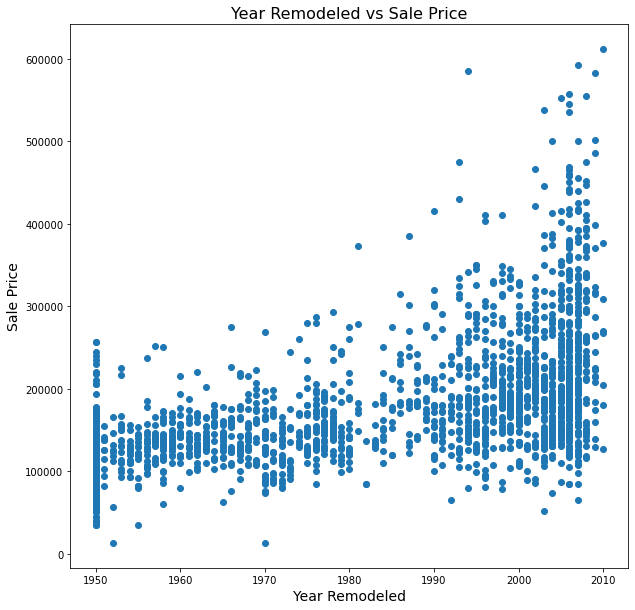

In [90]:
plt.figure(figsize=(10,10))

plt.scatter(df['year_remod_add'], df['saleprice'])
plt.title('Year Remodeled vs Sale Price', fontsize=16)
plt.xlabel('Year Remodeled', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.savefig('../images/scatterYRvSP.png', bbox_inches='tight')

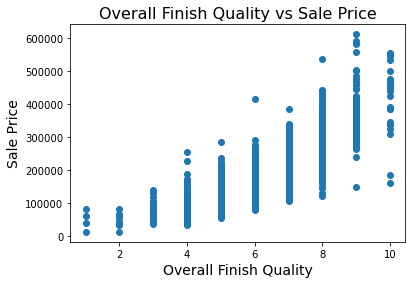

In [91]:
plt.scatter(df['overall_qual'], df['saleprice'])
plt.title('Overall Finish Quality vs Sale Price', fontsize=16)
plt.xlabel('Overall Finish Quality', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)

plt.savefig('../images/scatterQuavSP.png', bbox_inches='tight')

**Conclusions and Recommendations**

Poly Model will be used for sale price predictions.

In [ ]:
Recommendations: 
Based on the Correlation Matrix,
we can see that House Quality and Year Remodel/Build are the top 10 factors for higher sale prices
    Homeowners should make some home improvements to improve sale prices
